# HW2

In [338]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

#### Implementing Simple Artificial Neural Network for multiclass classification

In [339]:
class SingleLayerNetwork:
    """ A single layer neural net for multiclass classification. """
    
    def __init__(self):
        self.weights = None
        self.learning_rate = None
    
    def fit(self, X, y, epoch=10, learning_rate=0.001):
        """
        Learns the net's parameters based on provided labelled data.
        
        :param X: the train objects
        :param y: the one-hot encoded classes of given objects
        :param epoch: the number of passes over the entire dataset
        :param learning_rate: size of gradient descent step
        """
        # randomly initialize net's weights
        self.__initialize_net(X, y, learning_rate)  
        
        # add constant feature
        X = np.insert(X, 0, 1, axis=1)            
        
        for i in range(epoch):
            # shuffle data before each epoch
            _X, _y = shuffle(X, y)
            
            for obj, label in zip(_X, _y):
                # make a gradient descent step
                self.__update_weights(obj, label) 
    

    def predict(self, X):
        """
        Predicts the class for given objects.
        
        :param X: an array of objects
        :returns: predicted classes of given objects in one-hot encoding
        """
        scores = self.__predict(np.insert(X, 0, 1, axis=1))
        return self.labels[np.argmax(scores, axis=1)]
    
    def __initialize_net(self, X, y, learning_rate):
        self.labels = np.unique(y, axis=0)
        self.learning_rate = learning_rate
        shape = (len(X[0]) + 1, len(self.labels))
        self.weights = np.random.uniform(-0.01, 0.01, shape)
    
    def __predict(self, X):
        return self.__softmax(X.dot(self.weights))

    def __backprop(self, X, y, scores):
        diff = scores - y
        self.weights -= self.learning_rate * np.outer(diff, X).T

    def __update_weights(self, X, y):
        scores = self.__predict(X)     # forward pass
        self.__backprop(X, y, scores)  # derivative backpropagation
        
    def __softmax(self, scores):
        e_x = np.exp(scores - np.max(scores))
        return e_x / e_x.sum(axis=0)


#### Loading and visualizing the MNIST dataset

In [340]:
mnist = input_data.read_data_sets("data/MNIST", one_hot=True)

Extracting data/MNIST\train-images-idx3-ubyte.gz
Extracting data/MNIST\train-labels-idx1-ubyte.gz
Extracting data/MNIST\t10k-images-idx3-ubyte.gz
Extracting data/MNIST\t10k-labels-idx1-ubyte.gz


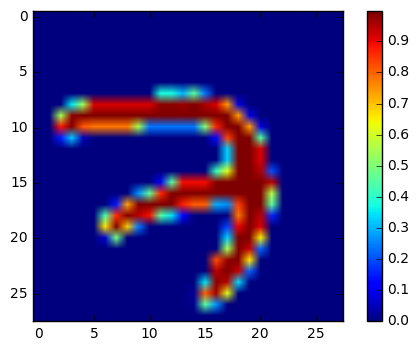

In [341]:
plt.imshow(mnist.train.images[0].reshape((28, 28)))
plt.colorbar()

#### Training the net to classify MNIST

In [342]:
net = SingleLayerNetwork()
net.fit(mnist.train.images, mnist.train.labels)

In [343]:
# compute classification accuracy on test images
y_pred = net.predict(mnist.test.images)
y_true = mnist.test.labels
correct = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
print('accuracy:', correct / len(y_true))

accuracy: 0.0096
